In [2]:
# GD：BGD，SGD，MBGD
# Momentum+GD：Momentum，NAG
# Ada+GD：Adagrad，Adam，RMSProp，AdaDelta

import torch
import torch.utils.data as Data
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 在神经网络中，参数默认是进行随机初始化的。如果不设置的话每次训练时的初始化都是随机的，导致结果不确定。
# 如果设置初始化，则每次初始化都是固定的。

# torch.manual_seed(args.seed) # 为CPU设置种子用于生成随机数，以使得结果是确定的
# torch.cuda.manual_seed(args.seed) # 为当前GPU设置随机种子；
# torch.cuda.manual_seed_all()
torch.manual_seed(1)

In [4]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

In [5]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))
print(x)
print(y)

tensor([[-1.0000],
        [-0.9798],
        [-0.9596],
        [-0.9394],
        [-0.9192],
        [-0.8990],
        [-0.8788],
        [-0.8586],
        [-0.8384],
        [-0.8182],
        [-0.7980],
        [-0.7778],
        [-0.7576],
        [-0.7374],
        [-0.7172],
        [-0.6970],
        [-0.6768],
        [-0.6566],
        [-0.6364],
        [-0.6162],
        [-0.5960],
        [-0.5758],
        [-0.5556],
        [-0.5354],
        [-0.5152],
        [-0.4949],
        [-0.4747],
        [-0.4545],
        [-0.4343],
        [-0.4141],
        [-0.3939],
        [-0.3737],
        [-0.3535],
        [-0.3333],
        [-0.3131],
        [-0.2929],
        [-0.2727],
        [-0.2525],
        [-0.2323],
        [-0.2121],
        [-0.1919],
        [-0.1717],
        [-0.1515],
        [-0.1313],
        [-0.1111],
        [-0.0909],
        [-0.0707],
        [-0.0505],
        [-0.0303],
        [-0.0101],
        [ 0.0101],
        [ 0.0303],
        [ 0.

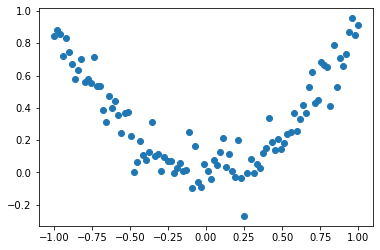

In [6]:
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [7]:
torch_dataset = Data.TensorDataset(x, y)
print("-----torch_dataset = Data.TensorDataset()-----")
print(type(torch_dataset))
print(len(torch_dataset))
print(torch_dataset)
# print(list(torch_dataset))   # [(tensor(), tensor()), (tensor(), tensor()), (...)]
print(type(torch_dataset[0]))
print(torch_dataset[0])
print(torch_dataset[0][0])
print(torch_dataset[0][0][0])

print("----loader = DataLoader()----")
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=2,)
print(type(loader))
print(len(loader))
# print(list(loader))   # [[], [], [], [tensor([[..], [..], [..]]), tensor([,,], [,,], [,,])]]
print(len(list(loader)))
# print(type(loader[0]))   # 'DataLoader' object does not support indexing
print("---")

# 注意！！for中，loader里面有几个参数，就会返回几个，比如这里是dataset = Data.TensorDataset(x, y), x|y是两个参数！！
for a,n in loader:  
    print(len(a)) # 2 都是2，因为一个batch里面只有两个tensor列表，分别是x和y的tensor列表
    print(len(a[0]))  # 32， 32， 32， 4。 因为x和y各100个数据，BATCHSIZE=32.
    print("///////")
    print(len(n))
    print(len(n[0]))  # 32， 32， 32， 4。 因为x和y各100个数据，BATCHSIZE=32.
# 转化数据集流程：
# 1.先把数据先全部变成tensor：dataset = Data.TensorDataset(a,b). [(tensor1, tensor2), (tensor3, tensor4), (..)]
# 2. 然后按要求在dataset里面去划分batch和给参数等：dataset_loader = Data.DataLoader(....)
# 综上所述：dataset.shape = len(x) or len(y)就是一个数组
# dataset_loader中，会把他按照batch_size来划分。因此[[tensor(....bs..), tensor(..bs..)],[..]..] -> shape(1, total/bs, 2, BATCH_SIZE)

-----torch_dataset = Data.TensorDataset()-----
<class 'torch.utils.data.dataset.TensorDataset'>
100
<class 'tuple'>
(tensor([-1.]), tensor([0.8474]))
tensor([-1.])
tensor(-1.)
----loader = DataLoader()----
<class 'torch.utils.data.dataloader.DataLoader'>
4
4
---
32
1
///////
32
1
32
1
///////
32
1
32
1
///////
32
1
4
1
///////
4
1


In [8]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)
        self.predict = torch.nn.Linear(20, 1)
        
    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [9]:
# 为每一个优化器创建一个net
net_SGD = Net()
net_Momentum = Net()
net_RMSprop = Net()
net_Adam = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]
print(list(net_SGD.parameters()))
print(list(net_Momentum.parameters()))
print(list(net_RMSprop.parameters()))
print(list(net_Adam.parameters()))

# 不同的optomizers, 每次初始化的参数都不一样所以不同网络的参数的初始化参数不一样
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]

[Parameter containing:
tensor([[ 0.5763],
        [ 0.3692],
        [-0.1979],
        [-0.0757],
        [-0.1899],
        [-0.3686],
        [ 0.4173],
        [-0.3406],
        [-0.5618],
        [ 0.2269],
        [-0.7228],
        [-0.2134],
        [ 0.5110],
        [ 0.3737],
        [ 0.8513],
        [-0.6820],
        [ 0.0087],
        [-0.2953],
        [-0.5593],
        [-0.5626]], requires_grad=True), Parameter containing:
tensor([ 0.2519,  0.1046, -0.5104, -0.7049, -0.8285,  0.9801, -0.1704, -0.2312,
        -0.3677, -0.5002, -0.9145, -0.5871,  0.6112,  0.2192, -0.3528, -0.3779,
         0.6388,  0.7208,  0.9634,  0.2917], requires_grad=True), Parameter containing:
tensor([[ 0.1080, -0.0180, -0.1307, -0.2191,  0.1362, -0.0325,  0.0919,  0.0110,
         -0.2087, -0.1097,  0.0629, -0.0453, -0.2159,  0.0784,  0.0086, -0.0719,
          0.0903,  0.0472, -0.0825,  0.2009]], requires_grad=True), Parameter containing:
tensor([0.1122], requires_grad=True)]
[Parameter cont

Epoch: 0
Epoch: 1
Epoch: 2
Epoch: 3
Epoch: 4
Epoch: 5
Epoch: 6
Epoch: 7
Epoch: 8
Epoch: 9
Epoch: 10
Epoch: 11


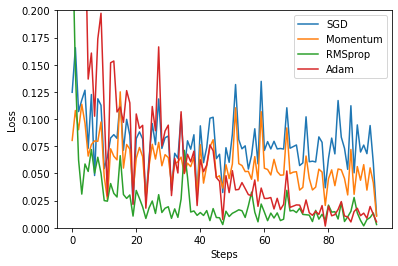

In [11]:
for epoch in range(EPOCH):
    print("Epoch:", epoch)
    for step, (b_x, b_y) in enumerate(loader):
        
        # 对每个优化器，优化属于他的神经网络
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)                 # get output for every net
            loss = loss_func(output, b_y)     # compute loss for every net
            opt.zero_grad()                   # clear gradients for next train
            loss.backward()                   # backpropagation, compute gradients
            opt.step()                        # apply gradients
            l_his.append(loss.data.numpy())   # loss recorder
            
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()

In [33]:
# zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
# 如果各个迭代器的元素个数不一致，则返回列表长度与最短的对象相同，利用 * 号操作符，可以将元组解压为列表。
a = [1,2,3]
b = [2,3,4]
c = [3,4,5]
d = [4,5,6,7]
zipped = zip(a,b)
zipped1 = zip(a,d)
zipped1_1 = zip(d,a)
zipped2 = zip(a,b,c)
zipped3 = zip(c,b,a)
print(list(zipped))
print(list(zipped1))
print(list(zipped1_1))
print(list(zipped2))
print(list(zipped3))
print("======== *zip ========,zipped赋值后好像只能用一次")
print(list(zip(*zipped3)))

for i,j in zip(a,b):
    print(i)
    print(j)

[(1, 2), (2, 3), (3, 4)]
[(1, 4), (2, 5), (3, 6)]
[(4, 1), (5, 2), (6, 3)]
[(1, 2, 3), (2, 3, 4), (3, 4, 5)]
[(3, 2, 1), (4, 3, 2), (5, 4, 3)]
======== *zip ========,zipped赋值后好像只能用一次
[]
1
2
2
3
3
4


In [76]:
a = np.array([1,2])
print(a)
a = np.reshape(a, (2,1))
print(a)

[1 2]
[[1]
 [2]]
